# 6장. 고전 수치최적화 알고리즘

## 6.3 그래디언트 디센트(Gradient Descent)

### 6.3.1 예제로 배우는 그래디언트 디센트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### 예제 1

$$
f(x) = x^2 - 4x + 6
$$

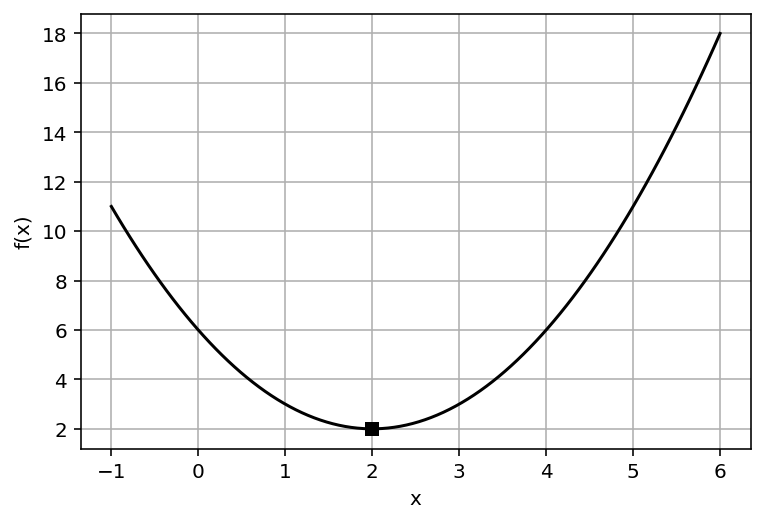

In [2]:
f = lambda x: x**2 - 4*x + 6 # 함수
x = np.linspace(-1, 6, 100) # 정의역(domain)
y = f(x) # 함수 계산

# 함수 그래프 그리기
plt.plot(x, y, 'k-')
plt.plot(2, 2, 'sk') # 최솟값 위치 표시
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


In [3]:
grad_f = lambda x: 2*x - 4 # 그래디언트

x0 = 0.0 # 초깃값
MaxIter = 10 # 반복 횟수
learning_rate = 0.25 # 학습률
print("step\tx\tf(x)")
print("{:02d}\t{:6.5f}\t{:6.5f}".format(0, x0, f(x0)))
for i in range(MaxIter):
    x1 = x0 - learning_rate * grad_f(x0) # 알고리즘
    x0 = x1 # 업데이트
    print("{:02d}\t{:6.5f}\t{:6.5f}".format(i+1, x0, f(x0)))

step	x	f(x)
00	0.00000	6.00000
01	1.00000	3.00000
02	1.50000	2.25000
03	1.75000	2.06250
04	1.87500	2.01562
05	1.93750	2.00391
06	1.96875	2.00098
07	1.98438	2.00024
08	1.99219	2.00006
09	1.99609	2.00002
10	1.99805	2.00000


In [4]:
def gradient_descent(func, grad_func, x0, learning_rate=0.01, MaxIter=10, verbose=True):
    paths = []
    for i in range(MaxIter):
        x1 = x0 - learning_rate * grad_func(x0)
        if verbose:
            print('{0:03d} : {1:4.3f}, {2:4.2E}'.format(i, x1, func(x1)))
        x0 = x1
        paths.append(x0)
    return(x0, func(x0), np.array(paths))

000 : 0.800, 3.44E+00
001 : 1.280, 2.52E+00
002 : 1.568, 2.19E+00
003 : 1.741, 2.07E+00
004 : 1.844, 2.02E+00
005 : 1.907, 2.01E+00
006 : 1.944, 2.00E+00
007 : 1.966, 2.00E+00
008 : 1.980, 2.00E+00


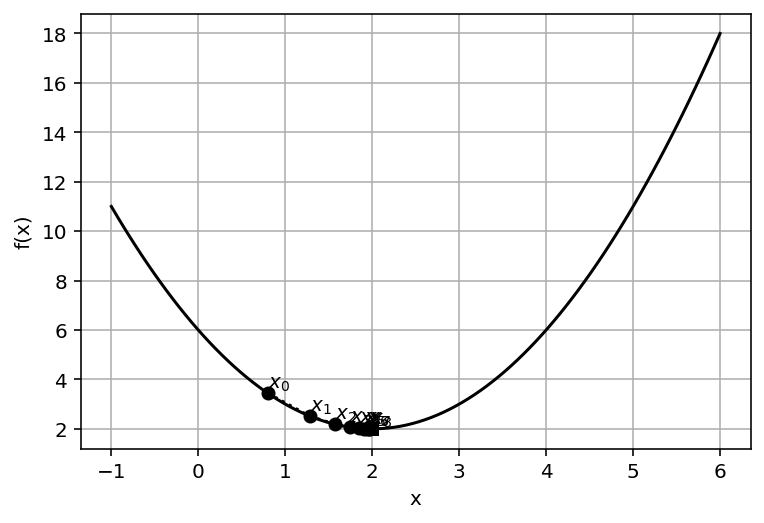

In [5]:
xopt, fopt, paths = gradient_descent(f, grad_f, 0.0, learning_rate=0.2, MaxIter=9)

plt.plot(x, y, 'k-')
plt.plot(2, 2, 'sk')
plt.plot(paths, f(paths), 'ko:')
for k, point in enumerate(paths):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

#### 큰 학습률

000 : 4.200, 6.84E+00
001 : -0.420, 7.86E+00
002 : 4.662, 9.09E+00
003 : -0.928, 1.06E+01
004 : 5.221, 1.24E+01
005 : -1.543, 1.46E+01
006 : 5.897, 1.72E+01
007 : -2.287, 2.04E+01
008 : 6.716, 2.42E+01


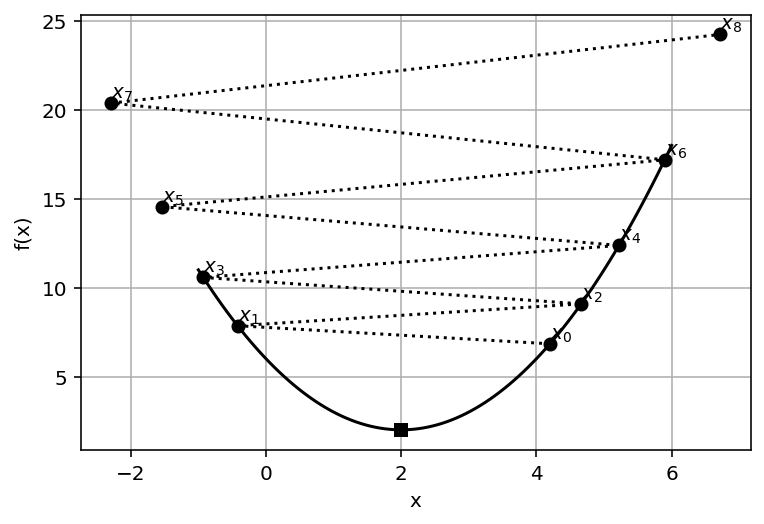

In [6]:
xopt, fopt, paths = gradient_descent(f, grad_f, 0.0, learning_rate=1.05, MaxIter=9)
plt.plot(x, y, 'k-') # 그래프
plt.plot(2, 2, 'sk') # 정답
plt.plot(paths, f(paths), 'ko:') # 추정치의 경로
for k, point in enumerate(paths):
    # 위치 표시
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

#### 낮은 학습률

000 : 0.200, 5.24E+00
001 : 0.380, 4.62E+00
002 : 0.542, 4.13E+00
003 : 0.688, 3.72E+00
004 : 0.819, 3.39E+00
005 : 0.937, 3.13E+00
006 : 1.043, 2.92E+00
007 : 1.139, 2.74E+00
008 : 1.225, 2.60E+00


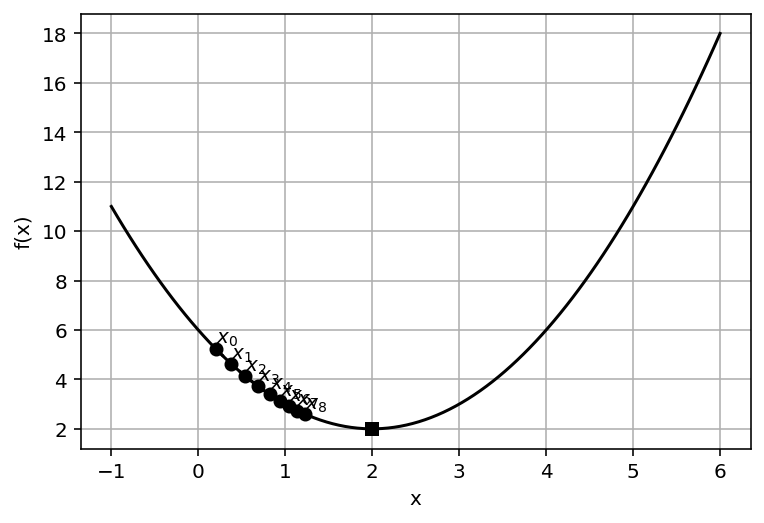

In [7]:
xopt, fopt, paths = gradient_descent(f, grad_f, 0.0, learning_rate=0.05, MaxIter=9)
plt.plot(x, y, 'k-') # 그래프
plt.plot(2, 2, 'sk') # 정답
plt.plot(paths, f(paths), 'ko:') # 추정치의 경로
for k, point in enumerate(paths):
    # 위치 표시
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [8]:
xopt, fopt, paths = gradient_descent(f, grad_f, 0.0, learning_rate=0.05, MaxIter=1000)
print(xopt)
# 출력값 1.9999999999999991

000 : 0.200, 5.24E+00
001 : 0.380, 4.62E+00
002 : 0.542, 4.13E+00
003 : 0.688, 3.72E+00
004 : 0.819, 3.39E+00
005 : 0.937, 3.13E+00
006 : 1.043, 2.92E+00
007 : 1.139, 2.74E+00
008 : 1.225, 2.60E+00
009 : 1.303, 2.49E+00
010 : 1.372, 2.39E+00
011 : 1.435, 2.32E+00
012 : 1.492, 2.26E+00
013 : 1.542, 2.21E+00
014 : 1.588, 2.17E+00
015 : 1.629, 2.14E+00
016 : 1.666, 2.11E+00
017 : 1.700, 2.09E+00
018 : 1.730, 2.07E+00
019 : 1.757, 2.06E+00
020 : 1.781, 2.05E+00
021 : 1.803, 2.04E+00
022 : 1.823, 2.03E+00
023 : 1.840, 2.03E+00
024 : 1.856, 2.02E+00
025 : 1.871, 2.02E+00
026 : 1.884, 2.01E+00
027 : 1.895, 2.01E+00
028 : 1.906, 2.01E+00
029 : 1.915, 2.01E+00
030 : 1.924, 2.01E+00
031 : 1.931, 2.00E+00
032 : 1.938, 2.00E+00
033 : 1.944, 2.00E+00
034 : 1.950, 2.00E+00
035 : 1.955, 2.00E+00
036 : 1.959, 2.00E+00
037 : 1.964, 2.00E+00
038 : 1.967, 2.00E+00
039 : 1.970, 2.00E+00
040 : 1.973, 2.00E+00
041 : 1.976, 2.00E+00
042 : 1.978, 2.00E+00
043 : 1.981, 2.00E+00
044 : 1.983, 2.00E+00
045 : 1.98

#### 예제 2

$$
f(x,y) = 3(x-2)^2 + (y-2)^2
$$

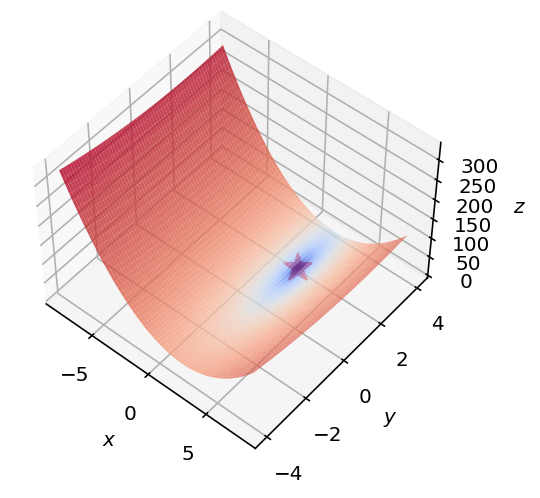

In [9]:
f = lambda x,y : 3*(x-2)**2 + (y-2)**2 # 손실함수

# 정의역
xmin, xmax, xstep = -8.0, 8.0, .25
ymin, ymax, ystep = -4.0, 4.0, .125
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

from visualize import surf

minima_ = np.array([[2], [2]]) # 정답
surf(f, x, y, minima=minima_) # 그래프

/Users/dongwook/Documents/github/tfopt/notebooks/visualize.py:24: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap='coolwarm')


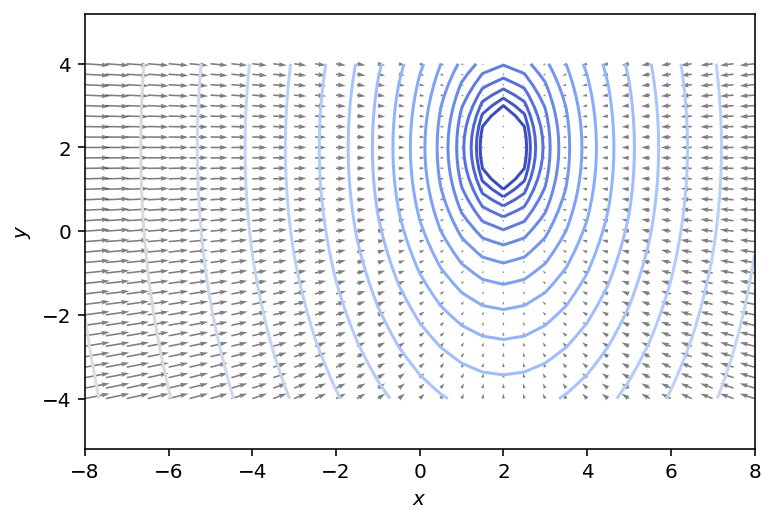

In [10]:
grad_f_x = lambda x, y: 6 * (x-2)
grad_f_y = lambda x, y: 2 * (y-2)

# 정의역
xmin, xmax, xstep = -8.0, 8.0, .5
ymin, ymax, ystep = -4.0, 4.0, .25
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

# 그래프
from visualize import contour_with_quiver
contour_with_quiver(f, x, y, grad_f_x, grad_f_y)

$$
\min_{x, y} f(x, y) = 3(x-2)^2 + (y-2)^2
$$

In [11]:
f = lambda x,y : 3*(x-2)**2 + (y-2)**2 # 손실함수
grad_f_x = lambda x, y: 6 * (x-2) # 손실함수의 x미분
grad_f_y = lambda x, y: 2 * (y-2) # 손실함수의 y미분

x0 = np.array([-2., -2.]) # 초깃값
MaxIter = 10 # 반복 횟수
learning_rate = 0.25 # 학습률
print("step\t(x,y)\t\tf(x)")
print("{:02d}\t({:5.4f},{:5.4f}) : {:5.4f}".format(0, x0[0], x0[1], f(*x0)))
for i in range(MaxIter):
    grad = np.array([grad_f_x(*x0), grad_f_y(*x0)]) # 그래디언트 계산
    x1 = x0 - learning_rate * grad # 업데이트
    x0 = x1
    print("{:02d}\t({:5.4f},{:5.4f}) : {:5.4f}".format(i+1, x0[0], x0[1], f(*x0)))

step	(x,y)		f(x)
00	(-2.0000,-2.0000) : 64.0000
01	(4.0000,0.0000) : 16.0000
02	(1.0000,1.0000) : 4.0000
03	(2.5000,1.5000) : 1.0000
04	(1.7500,1.7500) : 0.2500
05	(2.1250,1.8750) : 0.0625
06	(1.9375,1.9375) : 0.0156
07	(2.0312,1.9688) : 0.0039
08	(1.9844,1.9844) : 0.0010
09	(2.0078,1.9922) : 0.0002
10	(1.9961,1.9961) : 0.0001


In [12]:
def gradient_descent_twod(func, gradx, grady, x0, MaxIter=10, learning_rate=0.25):
    paths = [x0]
    fval_paths = [func(x0[0], x0[1])]
    for i in range(MaxIter):
        grad = np.array([gradx(*x0), grady(*x0)])
        x1 = x0 - learning_rate * grad
        fval = func(*x0)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

/Users/dongwook/Documents/github/tfopt/notebooks/visualize.py:55: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap='coolwarm')


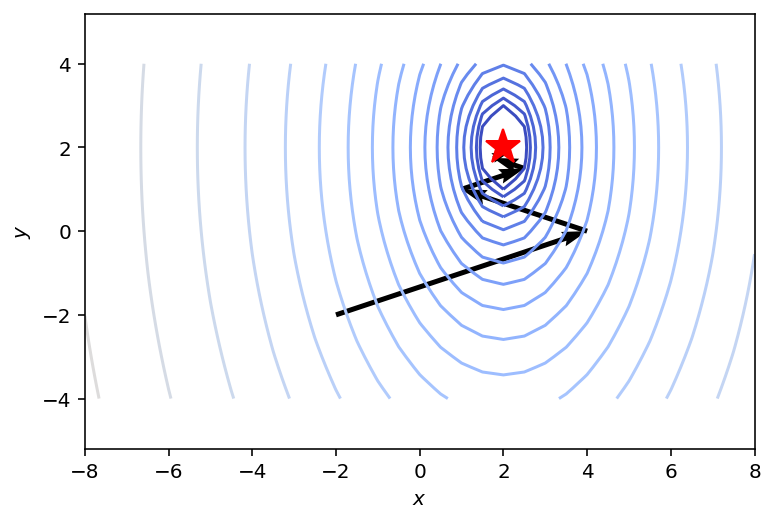

In [13]:
from visualize import contour_with_path
x0 = np.array([-2., -2.]) # 초깃값
xopt, fopt, paths, fval_paths = gradient_descent_twod(f, grad_f_x, grad_f_y, x0)
contour_with_path(f, x, y, paths, minima=minima_)

### 6.3.2 그래디언트 디센트 방법의 한계점

#### 초깃값 민감성

000 : 2.851, 8.17E-01
001 : 3.462, -1.09E+00
002 : 4.363, -4.10E+00
003 : 4.971, -4.81E+00
004 : 4.895, -4.81E+00
005 : 4.919, -4.81E+00
000 : 1.224, 1.15E+00
001 : 0.885, 6.85E-01
002 : 0.551, 2.89E-01
003 : 0.303, 9.04E-02
004 : 0.156, 2.43E-02
005 : 0.079, 6.19E-03


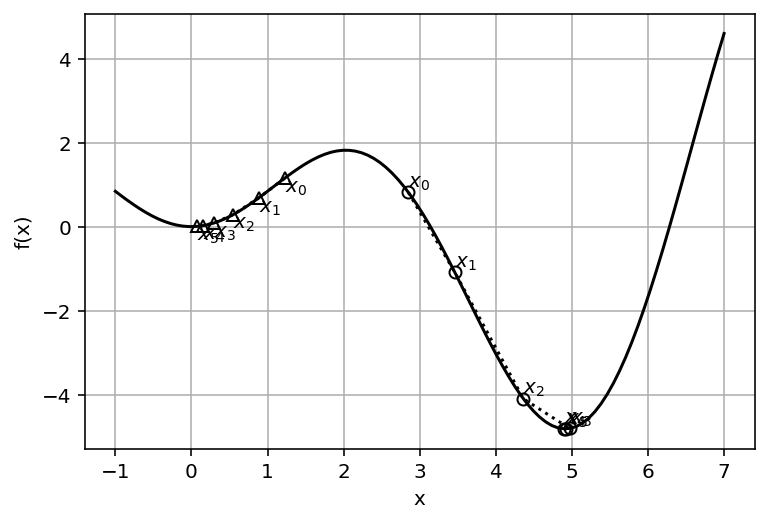

In [14]:
f = lambda x: x * np.sin(x)
x = np.linspace(-1, 7, 100) # 정의역(domain)
y = f(x) # 함수 계산
grad_f = lambda x: np.sin(x) + x * np.cos(x) # 손실함수의 x미분


x0 = 2.5 # 초깃값1
xopt1, _, paths1 = gradient_descent(f, grad_f, x0, learning_rate=0.25, MaxIter=6)

x0 = 1.5 # 초깃값2
xopt2, _, paths2 = gradient_descent(f, grad_f, x0, learning_rate=0.25, MaxIter=6)

# 그래프
plt.plot(x, y, 'k-')
plt.plot(paths1, f(paths1), 'ko:', markerfacecolor='none')
plt.plot(paths2, f(paths2), 'k^:', markerfacecolor='none')
for k, point in enumerate(paths1):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
for k, point in enumerate(paths2):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='top')
    
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

0 [0.   0.01] 0.0
1 [-0.00986798  0.01      ] -0.0009736145195259344
2 [-0.01973122  0.01973294] -0.003837860291047942
3 [-0.039157    0.03915702] -0.015056603776508653
4 [-0.07741473  0.07741473] -0.05799189153966888
5 [-0.15084258  0.15084258] -0.20825298255593722
6 [-0.27840969  0.27840969] -0.5887784369911024
7 [-0.43299341  0.43299341] -0.9563373303803551
8 [-0.49718979  0.49718979] -0.9999220591321399
9 [-0.49996321  0.49996321] -0.9999999866429123


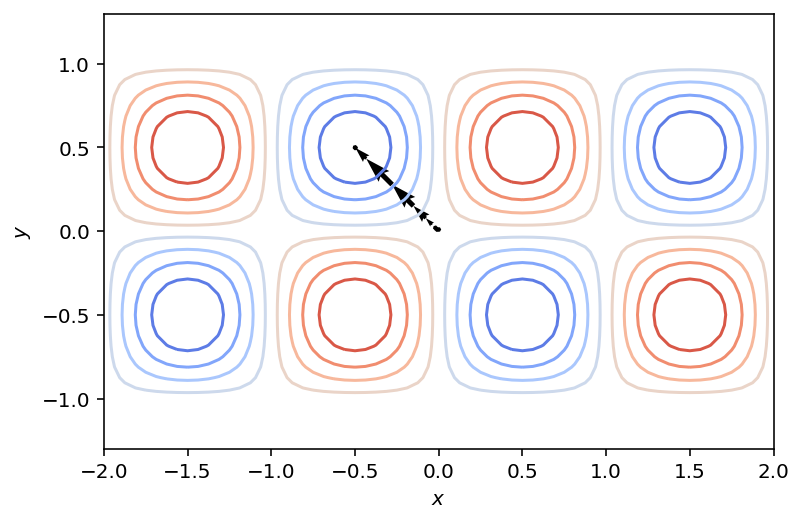

0 [ 0.   -0.01] -0.0
1 [ 0.00986798 -0.01      ] -0.0009736145195259344
2 [ 0.01973122 -0.01973294] -0.003837860291047942
3 [ 0.039157   -0.03915702] -0.015056603776508653
4 [ 0.07741473 -0.07741473] -0.05799189153966888
5 [ 0.15084258 -0.15084258] -0.20825298255593722
6 [ 0.27840969 -0.27840969] -0.5887784369911024
7 [ 0.43299341 -0.43299341] -0.9563373303803551
8 [ 0.49718979 -0.49718979] -0.9999220591321399
9 [ 0.49996321 -0.49996321] -0.9999999866429123


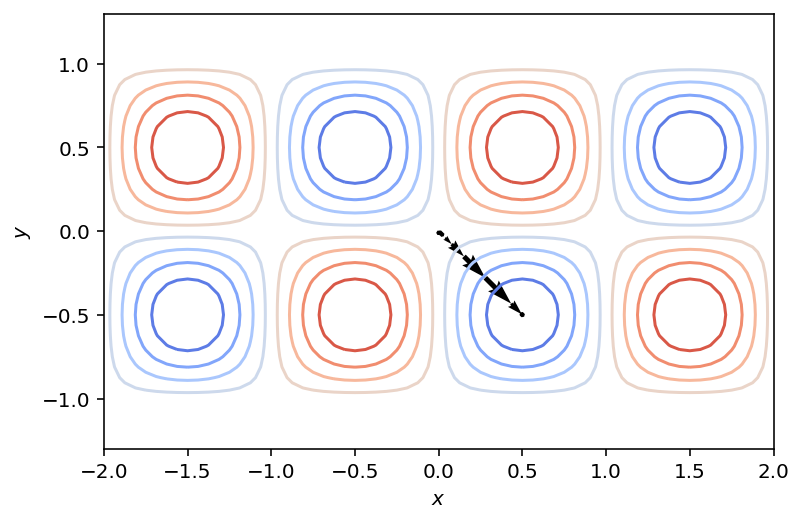

In [15]:
from numerical_optimizers import gradient_descent_2d

f = lambda x,y : np.sin(np.pi*x) * np.sin(np.pi*y)
xmin, xmax, xstep = -2.0, 2.0, .0625
ymin, ymax, ystep = -1.0, 1.0, .0625
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

grad_f_x = lambda x, y: np.pi*np.cos(np.pi*x) * np.sin(np.pi*y)
grad_f_y = lambda x, y: np.pi * np.sin(np.pi*x) * np.cos(np.pi*y)

learning_rate = 0.01

x0 = np.array([0, 0.01]) # 초깃값
xopt, fopt, paths, fval_paths = gradient_descent_2d(f, grad_f_x, grad_f_y, x0, learning_rate=0.1)
contour_with_path(f, x, y, paths, norm=None, level=np.linspace(-1, 1, 10))

x0 = np.array([0, -0.01]) # 초깃값
xopt, fopt, paths, fval_paths = gradient_descent_2d(f, grad_f_x, grad_f_y, x0, learning_rate=0.1)
contour_with_path(f, x, y, paths, norm=None, level=np.linspace(-1, 1, 10))

#### 학습률 민감성

000 : 2.570, 1.39E+00
001 : 2.651, 1.25E+00
002 : 2.745, 1.06E+00
003 : 2.852, 8.15E-01
004 : 2.974, 4.95E-01
005 : 3.113, 9.02E-02


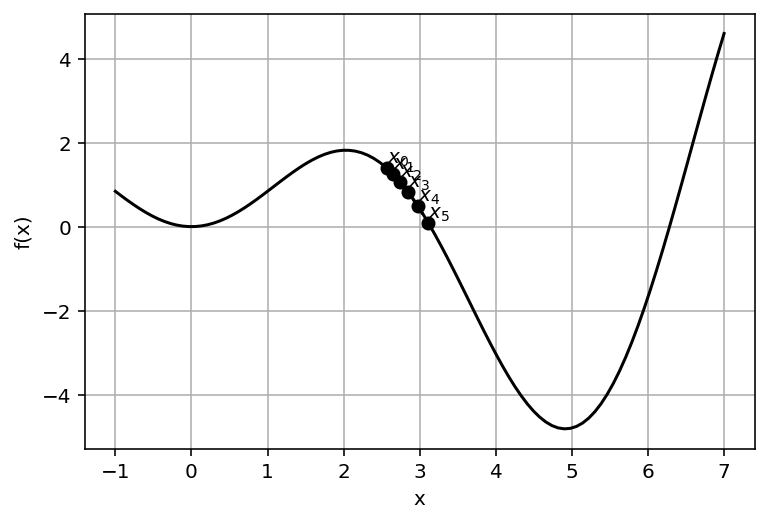

000 : 3.904, -2.70E+00
001 : 7.418, 6.72E+00
002 : 3.378, -7.91E-01
003 : 6.896, 3.97E+00
004 : 0.679, 4.27E-01
005 : -0.477, 2.19E-01


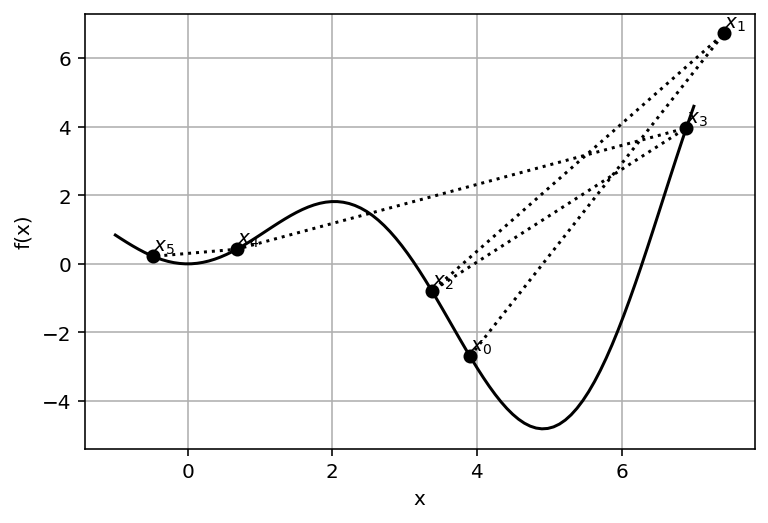

000 : 2.851, 8.17E-01
001 : 3.462, -1.09E+00
002 : 4.363, -4.10E+00
003 : 4.971, -4.81E+00
004 : 4.895, -4.81E+00
005 : 4.919, -4.81E+00


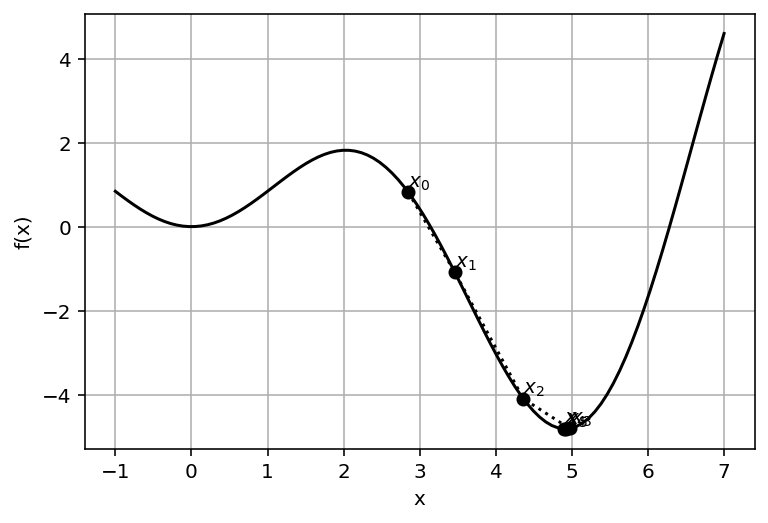

In [16]:
f = lambda x: x * np.sin(x)
x = np.linspace(-1, 7, 100) # 정의역(domain)
y = f(x) # 함수 계산
grad_f = lambda x: np.sin(x) + x * np.cos(x) # 손실함수의 x미분

x0 = 2.5 # 초깃값
xopt, fopt, paths = gradient_descent(f, grad_f, x0, learning_rate=0.05, MaxIter=6)

plt.plot(x, y, 'k-')
plt.plot(paths, f(paths), 'ko:')
for k, point in enumerate(paths):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

xopt, fopt, paths = gradient_descent(f, grad_f, x0, learning_rate=1.00, MaxIter=6)
plt.plot(x, y, 'k-')
plt.plot(paths, f(paths), 'ko:')
for k, point in enumerate(paths):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

xopt, fopt, paths = gradient_descent(f, grad_f, x0, learning_rate=0.25, MaxIter=6)
plt.plot(x, y, 'k-')
plt.plot(paths, f(paths), 'ko:')
for k, point in enumerate(paths):
    plt.text(point, f(point), '$x_{0}$'.format(k), 
            verticalalignment='bottom')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## 6.4 그래디언트 디센트를 사용한 선형회귀 모델 학습

### 6.4.1 선형회귀 문제 수식 소개

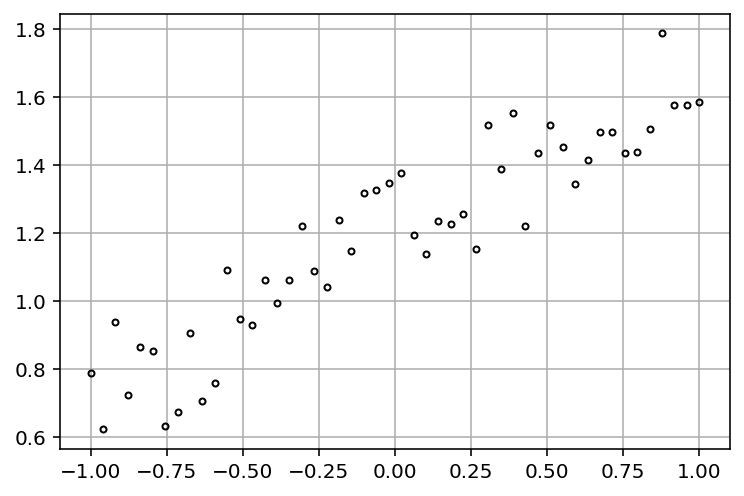

In [17]:
# Target function
np.random.seed(320)
x_train = np.linspace(-1, 1, 50)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))
plt.plot(x_train, y_train, '.k', markerfacecolor='none')
plt.grid()
plt.show()

### 6.4.2 그래디언트 디센트 방법 적용

In [18]:
# 손실함수
def loss(a, b):
    N = len(x_train)
    val = 0.0
    for i in range(N):
        val += 0.5 * ( a * x_train[i] + b - y_train[i] )**2
    return val / N

# 손실함수의 a방향 미분
def loss_grad_a(a, b):
    N = len(x_train)
    val = 0.0
    for i in range(N):
        er = a * x_train[i] + b - y_train[i]
        val += er * x_train[i]
    return val / N

# 손실함수의 b방향 미분
def loss_grad_b(a, b):
    N = len(x_train)
    val = 0.0
    for i in range(N):
        er = a * x_train[i] + b - y_train[i]
        val += er
    return val / N

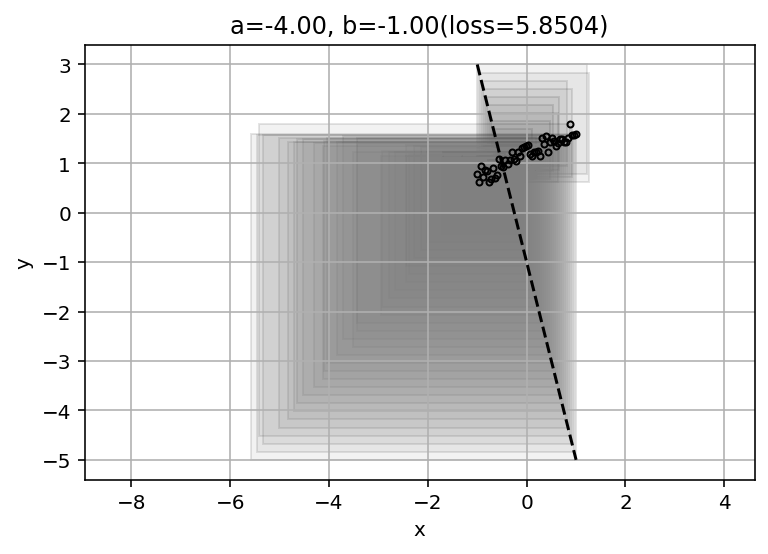

In [19]:
def visualize_l2(w, b, x_train, y_train, loss):
    from matplotlib.patches import Rectangle
    loss_name = loss.__name__
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, w * x_train + b, '--k')
    currentAxis = plt.gca()
    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        w * xx + b - yy, w * xx + b - yy,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("a={:1.2f}, b={:1.2f}({}={:5.4f})".format(w, b, loss_name, loss(w,b)))

visualize_l2(-4, -1, x_train, y_train, loss)
plt.show()

In [20]:
def gradient_descent_2d(func, gradx, grady, x0, MaxIter=10, learning_rate=0.25):
    paths = [x0]
    fval_paths = [func(x0[0], x0[1])]
    for i in range(MaxIter):
        grad = np.array([gradx(*x0), grady(*x0)])
        x1 = x0 - learning_rate * grad
        x0 = x1
        fval = func(*x0)
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

In [21]:
w0 = np.array([-4, -1]) 
wopt, fopt, paths, fval_paths = gradient_descent_2d(loss, loss_grad_a, loss_grad_b, w0, learning_rate=0.5, MaxIter=30)

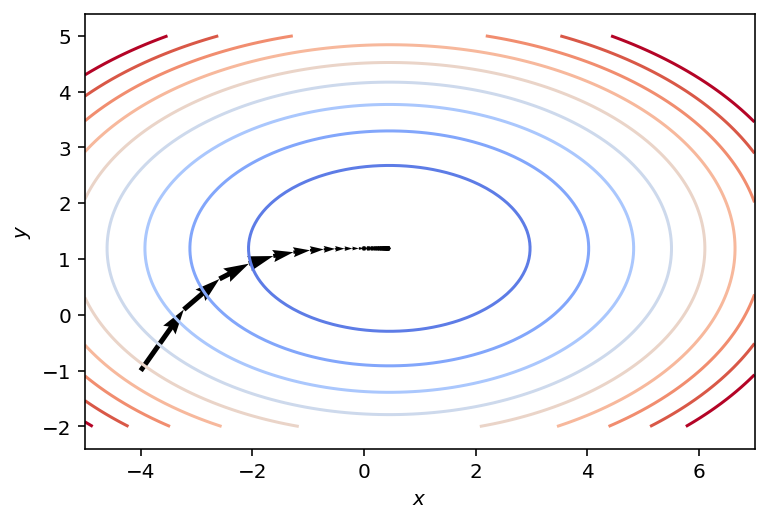

In [22]:
a = np.linspace(-5, 7, 101)
b = np.linspace(-2, 5, 101)
A, B = np.meshgrid(a,b)
LOSSW = A * 0
for i in range(LOSSW.shape[0]):
    for j in range(LOSSW.shape[1]):
        aij, bij = A[i,j], B[i,j]
        LOSSW[i,j] = loss(aij, bij)

contour_with_path(loss, A, B, paths, norm=None, level=np.linspace(0, 10, 10))

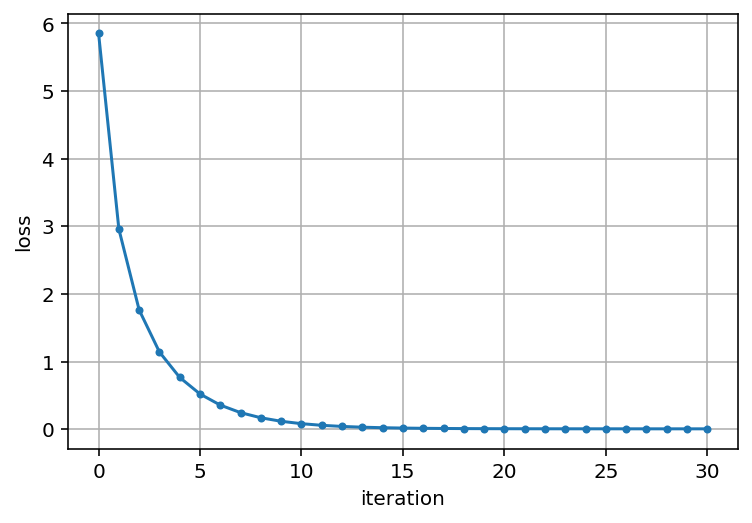

In [23]:
plt.plot(fval_paths, '.-')
plt.grid()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

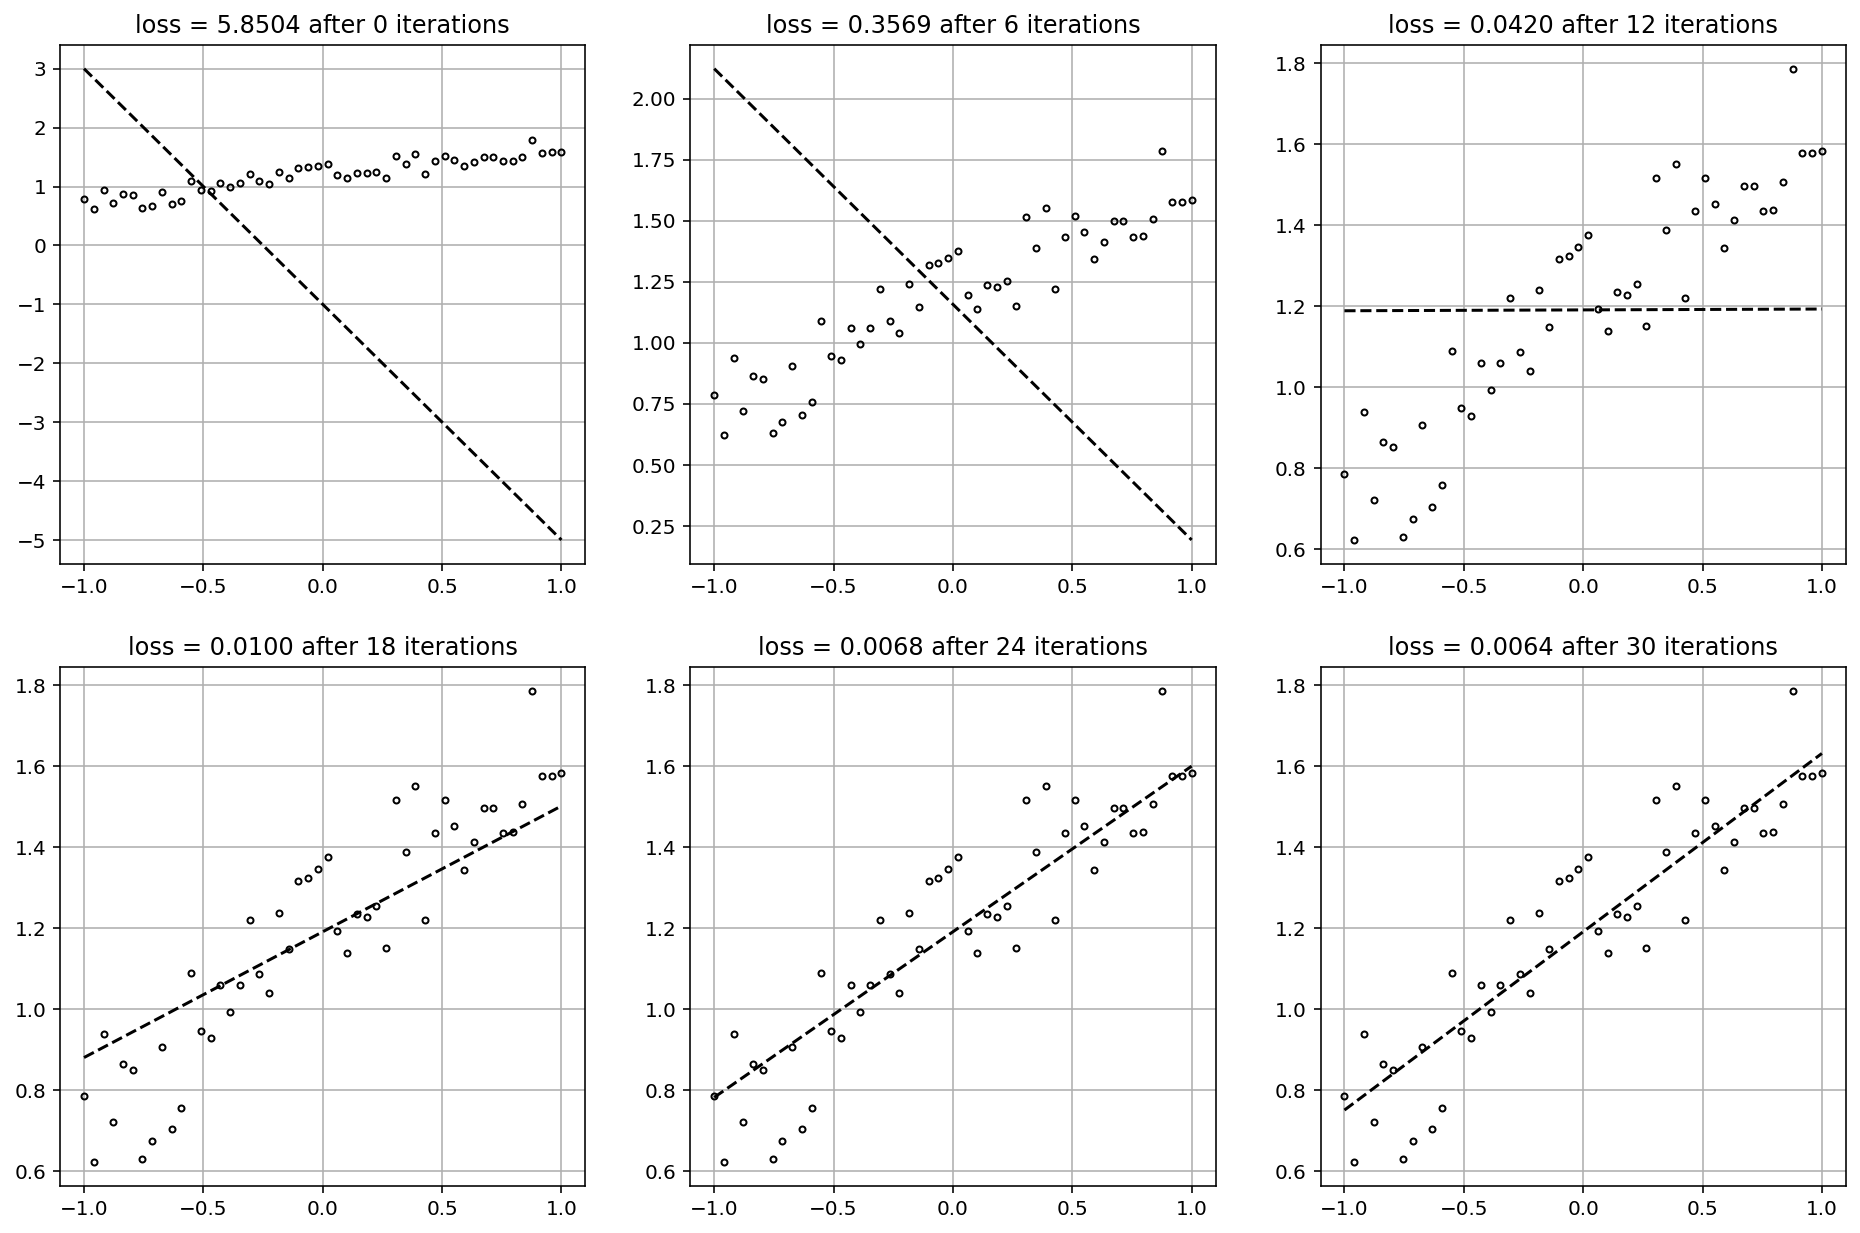

In [24]:
plt.figure(figsize=(16,9))
k = 1
for i in range(0, 31, 6):
    plt.subplot(2,3,k)
    plt.subplots_adjust(bottom=0)
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, paths[0, i] * x_train + paths[1, i], 'k--')
    plt.grid()
    plt.title('loss = {:5.4f} after {:d} iterations'.format(fval_paths[i], i))
    k+=1
plt.show()

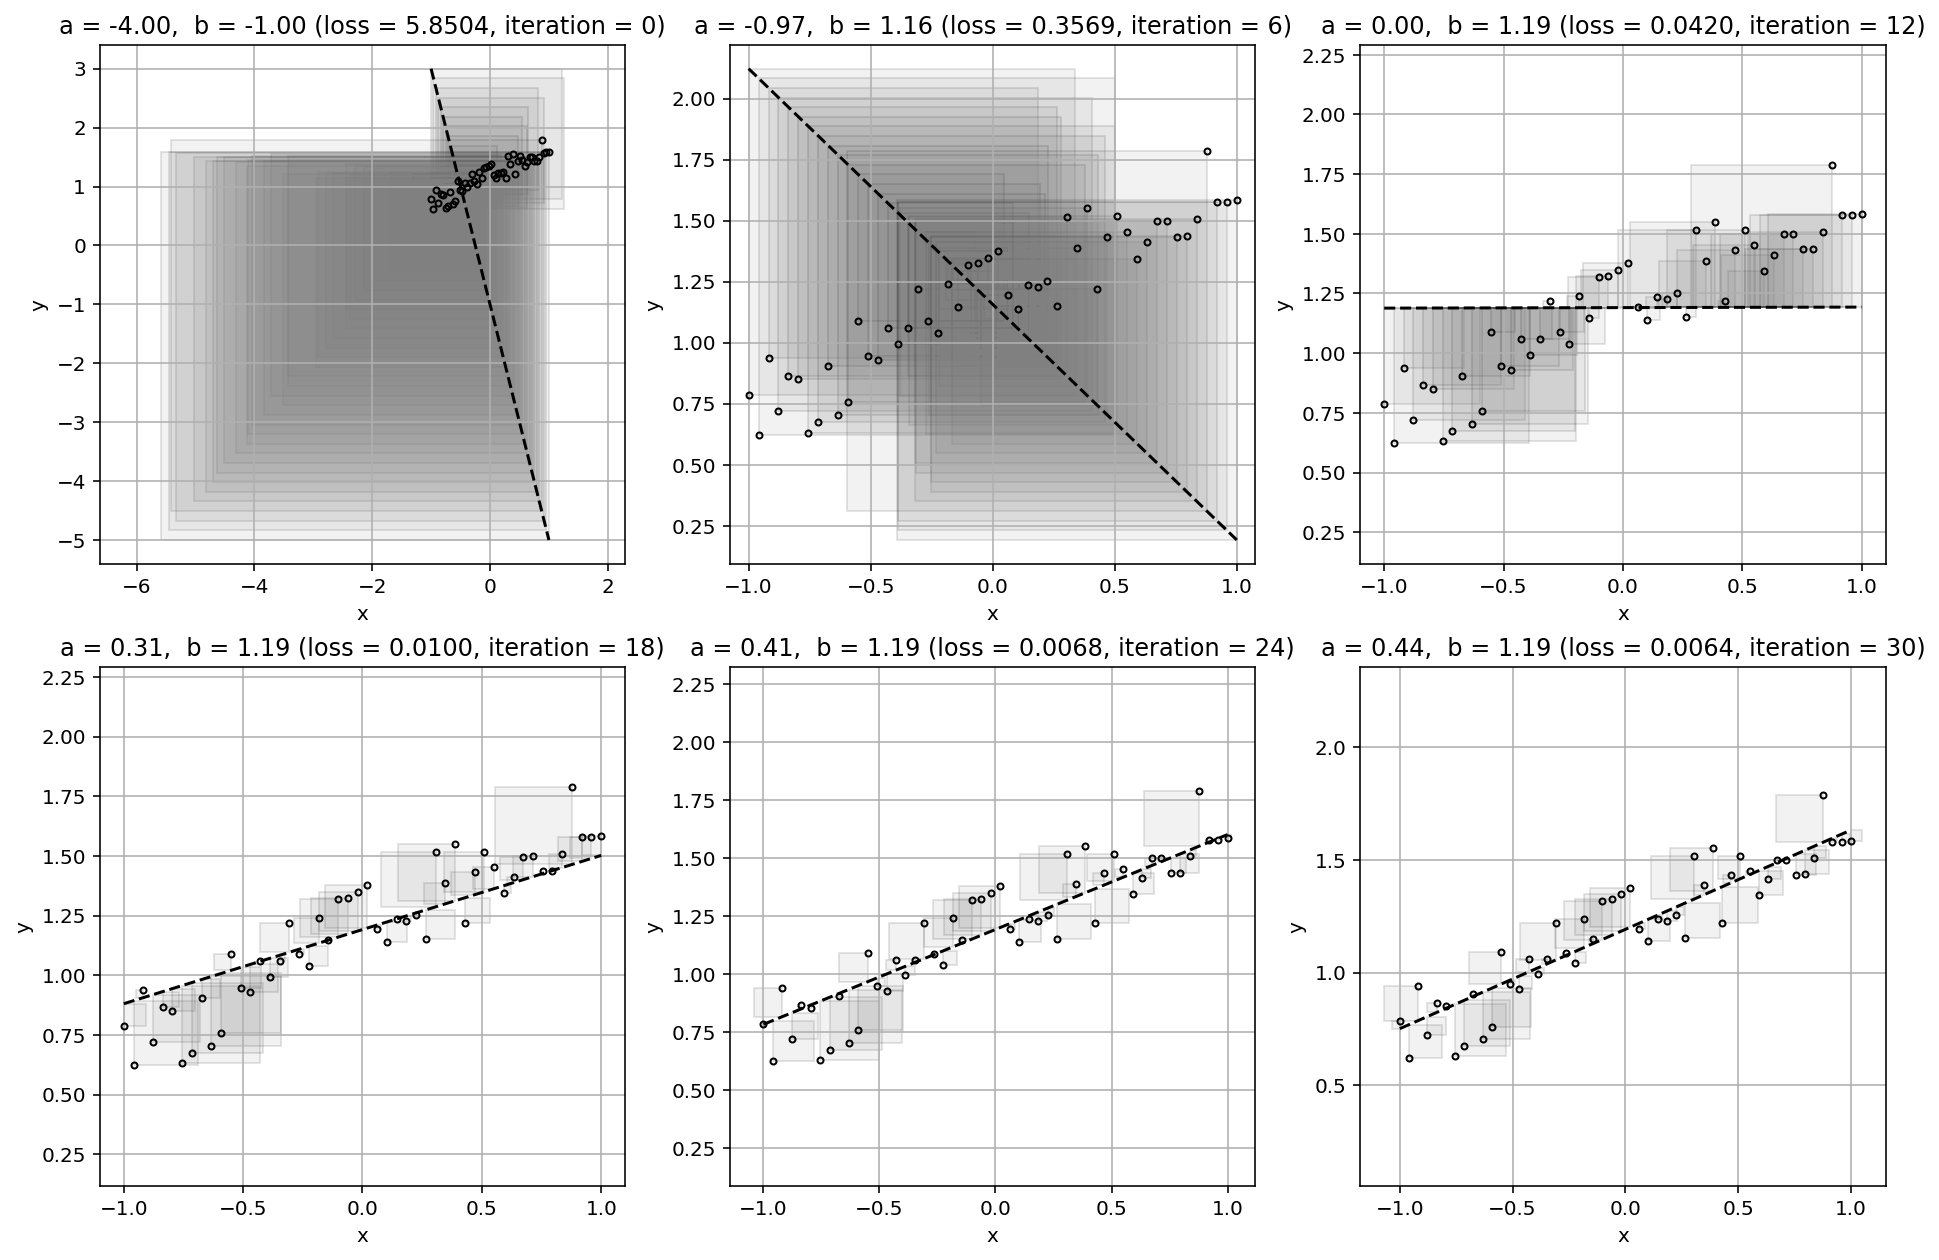

In [25]:
plt.figure(figsize=(16,9))
k = 1
for i in range(0, 31, 6):
    plt.subplot(2,3,k)
    plt.subplots_adjust(bottom=0)
    ai, bi = paths[0:2, i]
    visualize_l2(ai, bi, x_train, y_train, loss)
    plt.title('a = {:3.2f},  b = {:3.2f} (loss = {:5.4f}, iteration = {:d})'.format(ai, bi, fval_paths[i], i))
    k+=1
plt.show()

#### 일반화

In [26]:
# 손실함수
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * ( w[0] * x_set[i] + w[1] - y_set[i] )**2
    return val / N

# 손실함수의 그래디언트
def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w)) # 그래디언트
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

In [27]:
def gradient_descent_nd(func, grad_func, w0, x_set, y_set, MaxIter=10, learning_rate=0.25):
    paths = [w0]
    fval_paths = [func(w0, x_set, y_set)]
    for i in range(MaxIter):
        grad = grad_func(w0, x_set, y_set)
        w1 = w0 - learning_rate * grad
        fval = func(w0, x_set, y_set)
        w0 = w1
        paths.append(w0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return (w0, fval, paths, fval_paths)

In [28]:
w0 = np.array([-4, -1])
wopt, fopt, paths, fval_paths = gradient_descent_nd(loss, loss_grad, w0,
                                                    x_train, y_train, learning_rate=0.5, MaxIter=30)
print(wopt)

[0.44031858 1.19143584]
